In [5]:
import warnings
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

8.Build Model.

9.Apply the model.

10.Evaluate the model.

11.Finding Optimal K value

12.Repeat 6,7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [6]:
import numpy as np
import pandas as pd

In [7]:
iris_df = pd.read_csv("iris.csv")
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
46,47,5.1,3.8,1.6,0.2,Iris-setosa
129,130,7.2,3.0,5.8,1.6,Iris-virginica
13,14,4.3,3.0,1.1,0.1,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
126,127,6.2,2.8,4.8,1.8,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [8]:
import seaborn as sns

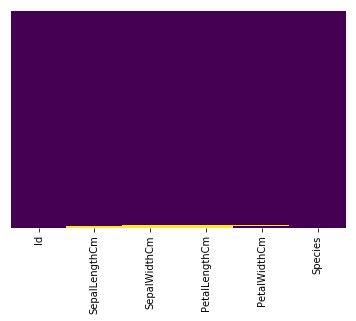

In [9]:
sns.heatmap(iris_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [11]:
na_cols = iris_df.select_dtypes(exclude=['object']).columns
for col in na_cols:
    iris_df[col].fillna(iris_df[col].mean(), inplace =True)

In [12]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

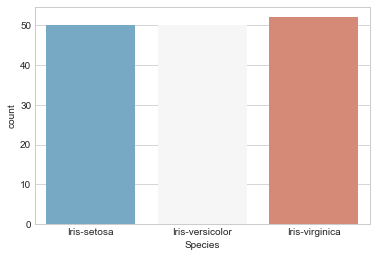

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Species',data=iris_df,palette='RdBu_r')

In [14]:
iris_df.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,52,52,52,52,52


In [15]:
species_names = iris_df.Species.unique()
cnt=0
for sp_name in species_names:
    iris_df.replace(sp_name,cnt, inplace=True)
    cnt=cnt+1

In [16]:
iris_df.Species.unique()

array([0, 1, 2], dtype=int64)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [17]:
iris_df.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.703344,-0.389905,0.865382,0.889288,0.942753
SepalLengthCm,0.703344,1.000000,-0.109368,0.871741,0.816256,0.775490
SepalWidthCm,-0.389905,-0.109368,1.000000,-0.420516,-0.355808,-0.415367
PetalLengthCm,0.865382,0.871741,-0.420516,1.000000,0.960771,0.939813
PetalWidthCm,0.889288,0.816256,-0.355808,0.960771,1.000000,0.951545
Species,0.942753,0.775490,-0.415367,0.939813,0.951545,1.000000


In [18]:
# By looking at the Correlation values, all the 4 independent variables are outside the range -0.1 and +0.1
# So, all independent variables have some correlatation to target variable

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [19]:
from numpy import var

X_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

for col_name in X_cols:
    print(var(iris_df[col_name]))

0.6721810735447886
0.1842934210526316
3.0517350877192952
0.573282502614151


In [20]:
# Variance of all independent variables are higher than 0.1

## Question 6

*Plot the scatter matrix for all the variables.*

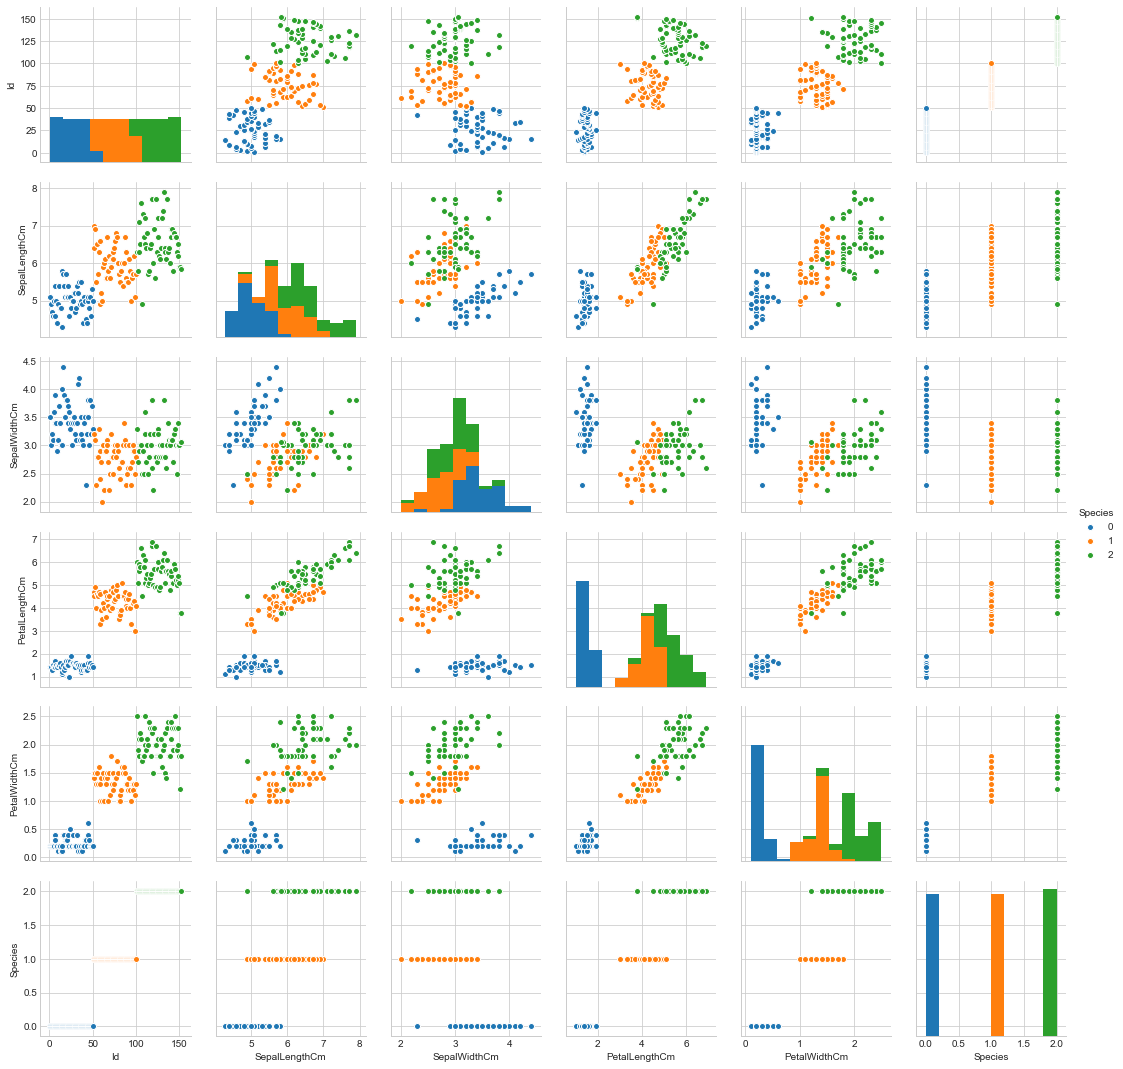

In [21]:
#sns.set(style="ticks")
sns.pairplot(iris_df, hue="Species")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [54]:
from sklearn.model_selection import train_test_split
X = iris_df[X_cols]
Y = iris_df.Species
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [56]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet.data[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))

In [57]:
accuracy_scores_manual = [];
accuracy_scores_sys = [];
for x in [3,5,9]:
    NNH = KNeighborsClassifier(n_neighbors=x, weights='uniform', metric='euclidean')
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    accuracy_scores_manual.append(getAccuracy(y_test, predicted_labels))
    accuracy_scores_sys.append(accuracy_score(y_test, predicted_labels))

In [59]:
print(accuracy_scores_sys)

[0.9354838709677419, 0.9354838709677419, 0.9032258064516129]


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [60]:
from sklearn.grid_search import GridSearchCV

k = [1,3,5,7,9,11,13,15,17,19]
knn = KNeighborsClassifier()
parameters = {'n_neighbors': k}
GS = GridSearchCV(knn,parameters,cv=10)

In [61]:
GS.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [62]:
GS.predict(X_test)

array([0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 0, 2, 1, 2, 0, 2, 0], dtype=int64)

In [63]:
GS.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [76]:
print('From the result, the best value should be', GS.best_estimator_.get_params()['n_neighbors'])

From the result, the best value should be 9


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [33]:
misclassification_error = []
for i in range(len(k)):
    misclassification_error.append(1-GS.grid_scores_[i][1])

In [34]:
misclassification_error

[0.07438016528925617,
 0.05785123966942152,
 0.06611570247933884,
 0.07438016528925617,
 0.04958677685950408,
 0.04132231404958675,
 0.04132231404958675,
 0.04132231404958675,
 0.04132231404958675,
 0.05785123966942152]

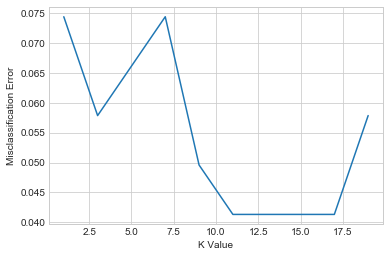

In [35]:
import matplotlib.pyplot as plt
plt.plot(k, misclassification_error)
plt.xlabel('K Value')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes with Iris Data

In [36]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [79]:
iris_df2 = pd.read_csv("iris.csv")

In [80]:
X_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

for col in X_cols:
    iris_df2[col].fillna(iris_df2[col].mean(), inplace =True)

In [81]:
X = iris_df[X_cols]
y = iris_df.Species

In [82]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
150    2
151    2
Name: Species, Length: 152, dtype: int64
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         5.100000         3.500       1.400000      0.200000
1         4.900000         3.000       1.400000      0.200000
2         4.700000         3.200       1.300000      0.200000
3         4.600000         3.100       1.500000      0.200000
4         5.000000         3.600       1.400000      0.200000
5         5.400000         3.900      

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [83]:
iris_df2.groupby(["Species"]).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,52,52,52,52,52


In [84]:
iris_df2.drop(['Id'],axis=1,inplace=True)

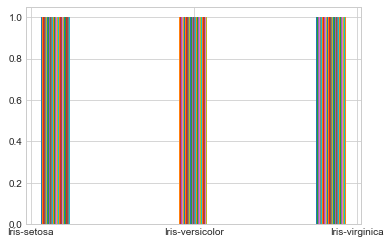

In [85]:
iris_df2['Species'].hist(bins=3)

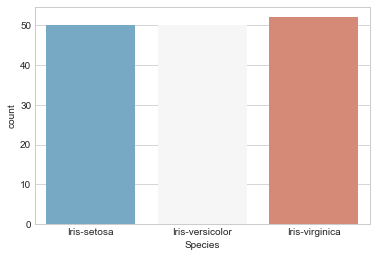

In [86]:
sns.set_style('whitegrid')
sns.countplot(x='Species',data=iris_df2,palette='RdBu_r')

### Question 12 
Find Correlation among all variables and give your insights 

In [87]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [88]:
species_names = iris_df2.Species.unique()
iris_df2['Species_Id'] = iris_df2['Species']
cnt=0
iris_df2.head()
for sp_name in species_names:
    iris_df2['Species_Id'].replace(sp_name,cnt,inplace=True)
    cnt=cnt+1

In [89]:
iris_df2.corr(method='pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Id
SepalLengthCm,1.000000,-0.109368,0.871741,0.816256,0.775490
SepalWidthCm,-0.109368,1.000000,-0.420516,-0.355808,-0.415367
PetalLengthCm,0.871741,-0.420516,1.000000,0.960771,0.939813
PetalWidthCm,0.816256,-0.355808,0.960771,1.000000,0.951545
Species_Id,0.775490,-0.415367,0.939813,0.951545,1.000000


In [90]:
iris_df2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Id
SepalLengthCm,1.0,-0.11,0.87,0.82,0.78
SepalWidthCm,-0.11,1.0,-0.42,-0.36,-0.42
PetalLengthCm,0.87,-0.42,1.0,0.96,0.94
PetalWidthCm,0.82,-0.36,0.96,1.0,0.95
Species_Id,0.78,-0.42,0.94,0.95,1.0


In [91]:
#From the correlation heat map, it's evident that
# 1. PetalLengthCm and PetalWidthCm are highly correlated = 0.96 (~1). So we can ignore either of the 2 attributes from model
# 2. As PetalWidthCm and SepalLengthCm also shows good correlation = 0.82, we can ignore PetalWidthCm 
#    (This will help the above point #1 too)

### Split data in Training and test set in 80:20.

In [113]:
from sklearn.model_selection import train_test_split

X2 = iris_df2[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]
Y2 = iris_df2.Species_Id
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.20)

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [114]:
# Initialise the Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

### Question 14 
Train and Fit NaiveBayes Model

In [132]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X2_train, y2_train)

GaussianNB(priors=None)

In [133]:
#Predict
expected = y2_test
predicted = model.predict(X2_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [134]:
# show Confusion Matrix
from sklearn import metrics
print(metrics.confusion_matrix(expected, predicted))

[[ 9  0  0]
 [ 0 11  2]
 [ 0  0  9]]


In [135]:
# show accuracy
print(metrics.accuracy_score(expected, predicted))

0.9354838709677419


In [136]:
#Show precision and Recall metrics

In [137]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      0.85      0.92        13
          2       0.82      1.00      0.90         9

avg / total       0.95      0.94      0.94        31



In [138]:
model = GaussianNB()
model.fit(X2_train_scaled, y2_train)
predicted2 = model.predict(X2_test_scaled)
print(metrics.accuracy_score(expected, predicted2))

0.9032258064516129


In [139]:
# Precision talks about accuracy of the model. It's associated to False Positives.
# As False Positives are very minimal, the precision is close to 95%

# Similarly Recall is associated to False Negative.
# As False Negatives are also very minimal, the recall is close to 95%

# Overall the model is having a good fit

# For Practice  - Optional

- Will Attach these optional answers separately 